# Лабораторная №1. Основы предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инструменты из файла preprocessing.ipynb.

#### Вопросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [64]:
path = "credit_3530203_70101.csv"
credit_df = pd.read_csv(path, index_col=0)

credit_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,none,real estate,31.0,none,own,1.0,unskilled resident,1.0,yes,good
499,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,none,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
500,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,none,car,38.0,none,own,1.0,skilled,1.0,yes,good
501,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,none,no known property,23.0,none,for free,1.0,skilled,1.0,yes,bad


Посмотрим на область значений каждого столбца. Области больше чем из десяти элементов обрежем.

In [36]:
for col in credit_df.columns:
    print(col, credit_df[col].unique()[:10])

checking_status ['0<=X<200' '>=200' '<0' 'no checking']
duration [18.  6. 24. 36.  9. 10. 15. 39. 12. -1.]
credit_history ['existing paid' 'critical/other existing credit' 'all paid'
 'delayed previously' 'no credits/all paid']
purpose ['radio/tv' 'new car' 'used car' 'business' 'furniture/equipment'
 'repairs' 'education' 'retraining' 'domestic appliance' 'other']
credit_amount [1301. 1323. 3123. 5493. 1126. 1216. 1207. 1309. 2360. 6850.]
savings_status ['<100' '100<=X<500' 'no known savings' '500<=X<1000' '>=1000']
employment ['>=7' '<1' '1<=X<4' 'unemployed' '4<=X<7' '0']
installment_commitment [4. 2. 1. 3.]
other_parties ['guarantor' 'none' 'co applicant']
property_magnitude ['real estate' 'car' 'life insurance' 'no known property']
age [32. 28. 27. 42. 49. 38. 24. 36. 34. 45.]
other_payment_plans ['none' 'bank' 'stores']
housing ['own' 'for free' 'rent']
existing_credits [1. 2. 4. 3.]
job ['unskilled resident' 'skilled' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
num_d

Отсюда делаем выводы:
- checking_status - порядковая
- duration - абсолютная
- credit_history - номинальная
- purpose - номинальная
- credit_amount - абсолютная
- savings_status - порядковая
- employment - порядковая
- installment_commitment - порядковая
- other_parties - номинальная
- property_magnitude - номинальная
- age - абсолютная
- other_payment_plans - номинальная
- housing - номинальная
- existing_credits - абсолютная
- job - номинальная
- num_dependents - абсолютная
- foreign_worker - номинальная
- class - номинальная

Найдем признак с наименьшей дисперсией.

In [42]:
credit_df.std()

duration                    12.748
credit_amount             2822.553
installment_commitment       1.106
age                         11.274
existing_credits             0.586
num_dependents               0.374
dtype: float64

Найдем признак, среднее значение которого отличается больше всего для двух классов.

In [43]:
credit_df.groupby(by="class").mean()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
class,,,,,,
bad,23.780,3682.220,3.067,33.317,1.354,1.152
good,18.799,3109.109,2.964,36.621,1.453,1.175


In [47]:
credit_df.loc[credit_df["job"] == "skilled"].groupby(by="class").count()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker
class,,,,,,,,,,,,,,,,,
bad,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
good,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213


<AxesSubplot:>

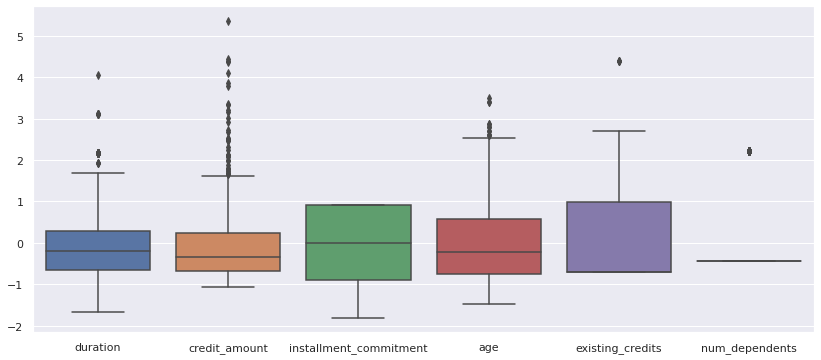

In [58]:
credit_df_numeric = credit_df.select_dtypes(include=np.number)
normalized_credit_df = (credit_df_numeric - credit_df_numeric.mean()) / credit_df_numeric.std()

plt.subplots(figsize=(14,6))
sns.boxplot(data=normalized_credit_df)

In [2]:
credit_df.isnull().sum() # пока не работает

NameError: name 'credit_df' is not defined